In [12]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

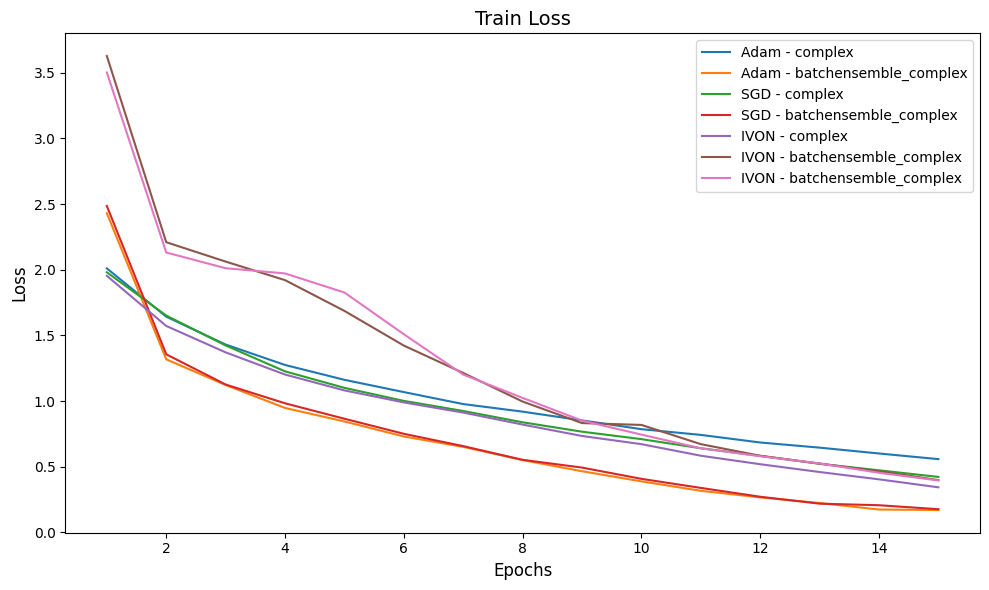

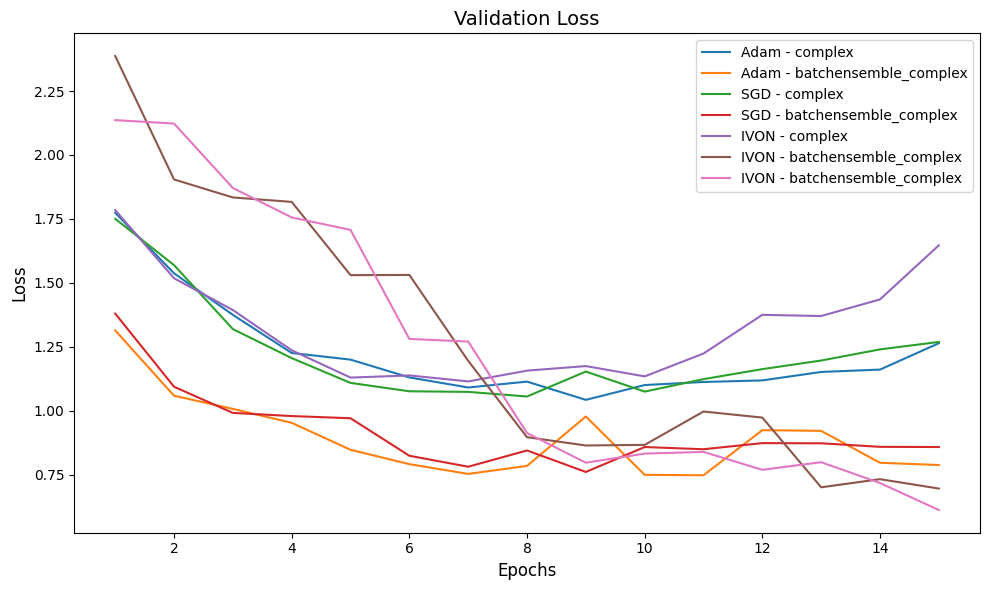

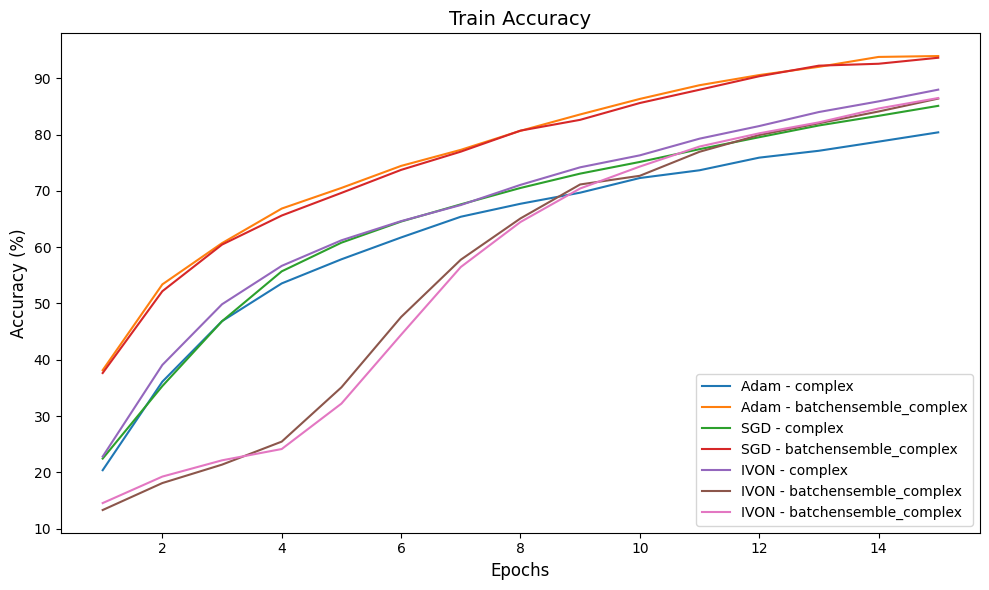

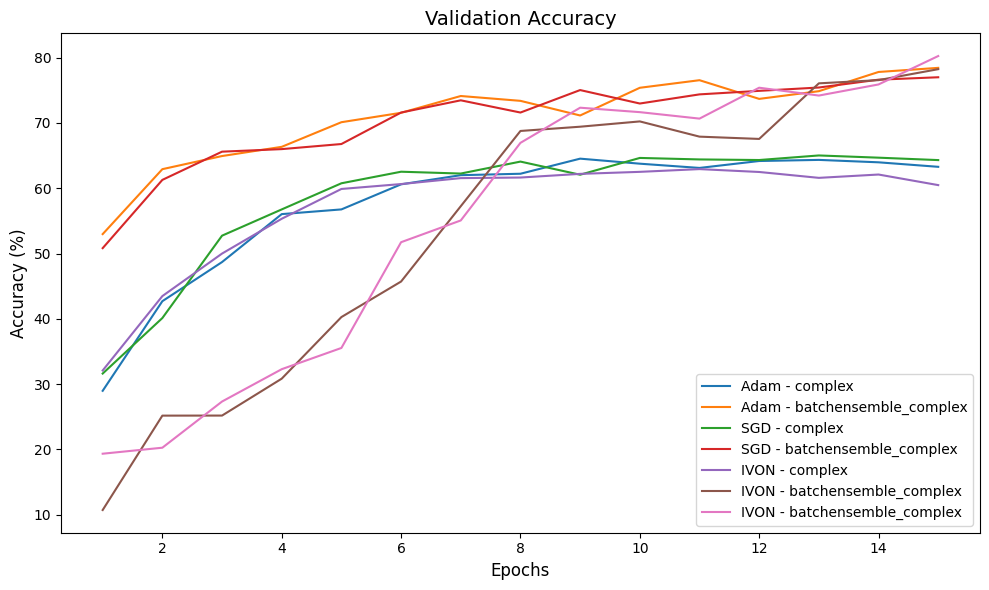

In [13]:
# Load and preprocess data from multiple files
file_paths = ["data/adam_results_simple_complex.csv", "data/adam_results_8_batchensemble.csv", "data/sgd_results_simple_complex.csv", "data/sgd_results_8_batchensemble.csv", "data/ivon_results_simple_complex.csv", "data/ivon_results_8_batchensemble.csv"]
optimizers = ["Adam", "Adam", "SGD", "SGD", "IVON", "IVON"]

# Load and preprocess the data
datasets = []
for path in file_paths:
    data = pd.read_csv(path)
    for column in ['train_loss', 'val_loss', 'train_acc', 'val_acc']:
        data[column] = data[column].apply(ast.literal_eval)
    datasets.append(data)

# Plot Train Loss
plt.figure(figsize=(10, 6))
for data, optimizer in zip(datasets, optimizers):
    subset1 = data[data['model_type'] == "complex"]
    subset2 = data[data['model_type'] == "batchensemble_complex"]

    for _, row in subset1.iterrows():
        epochs = range(1, len(row['train_loss']) + 1)
        plt.plot(epochs, row['train_loss'], label=f"{optimizer} - complex")
    for _, row in subset2.iterrows():
        epochs = range(1, len(row['train_loss']) + 1)
        plt.plot(epochs, row['train_loss'], label=f"{optimizer} - batchensemble_complex")

plt.title("Train Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

# Plot Validation Loss
plt.figure(figsize=(10, 6))
for data, optimizer in zip(datasets, optimizers):
    subset1 = data[data['model_type'] == "complex"]
    subset2 = data[data['model_type'] == "batchensemble_complex"]

    for _, row in subset1.iterrows():
        epochs = range(1, len(row['val_loss']) + 1)
        plt.plot(epochs, row['val_loss'], label=f"{optimizer} - complex")
    for _, row in subset2.iterrows():
        epochs = range(1, len(row['val_loss']) + 1)
        plt.plot(epochs, row['val_loss'], label=f"{optimizer} - batchensemble_complex")

plt.title("Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

# Plot Train Accuracy
plt.figure(figsize=(10, 6))
for data, optimizer in zip(datasets, optimizers):
    subset1 = data[data['model_type'] == "complex"]
    subset2 = data[data['model_type'] == "batchensemble_complex"]

    for _, row in subset1.iterrows():
        epochs = range(1, len(row['train_acc']) + 1)
        plt.plot(epochs, row['train_acc'], label=f"{optimizer} - complex")
    for _, row in subset2.iterrows():
        epochs = range(1, len(row['train_acc']) + 1)
        plt.plot(epochs, row['train_acc'], label=f"{optimizer} - batchensemble_complex")

plt.title("Train Accuracy", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 6))
for data, optimizer in zip(datasets, optimizers):
    subset1 = data[data['model_type'] == "complex"]
    subset2 = data[data['model_type'] == "batchensemble_complex"]

    for _, row in subset1.iterrows():
        epochs = range(1, len(row['val_acc']) + 1)
        plt.plot(epochs, row['val_acc'], label=f"{optimizer} - complex")
    for _, row in subset2.iterrows():
        epochs = range(1, len(row['val_acc']) + 1)
        plt.plot(epochs, row['val_acc'], label=f"{optimizer} - batchensemble_complex")
        
plt.title("Validation Accuracy", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()